In [14]:
import qiskit

zero = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circuit = qiskit.QuantumCircuit(zero,cr)

circuit.x(zero)
vector = qiskit.Aer.get_backend("statevector_simulator")
one = qiskit.execute(circuit,backend=vector).result().get_statevector()

circuit = qiskit.QuantumCircuit(zero,cr)
circuit.h(zero)
plus = qiskit.execute(circuit,backend=vector).result().get_statevector()

circuit = qiskit.QuantumCircuit(zero,cr)
circuit.x(zero)
circuit.h(zero)
minus = qiskit.execute(circuit,backend=vector).result().get_statevector()


In [12]:
import numpy as np
import pandas as pd
import qiskit
from matplotlib import pyplot as plt

vector = qiskit.Aer.get_backend("statevector_simulator")
r = np.random.randint(4)

def alice_random_state(number):
    zero = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(zero,cr)

    if number == 0:
        # state 0
        pass
    elif number == 1:
        # state 1
        circuit.x(zero)
    elif number == 2:
        # state +
        circuit.h(zero)
    elif number == 3:
        #state -
        circuit.x(zero)
        circuit.h(zero)
    d = {0:"zero",1:"one",2:"plus",3:"minus"}
#     print(f"Alice sent {d[number]}", "state")
    return circuit , number



def bob_measures():
    circ, alice_state_no = alice_random_state(np.random.randint(4))
    circ.measure(circ.qubits, circ.clbits)
    alice_and_bob_have_same_basis = 0
    if np.random.rand()<0.5:
#         print("normal basis chosen by Bob")
        alice_and_bob_have_same_basis = alice_state_no < 2
    else:
#         print("prime basis chosen by Bob")
        alice_and_bob_have_same_basis = alice_state_no > 1
        circ.h(circ.qubits)
    
    return np.array([alice_and_bob_have_same_basis , np.where(qiskit.execute(circ,backend=vector).result().get_statevector())[0][0]])

def BB84_experiment(no_of_measurements):
    return np.array([bob_measures() for i in range(no_of_measurements)])

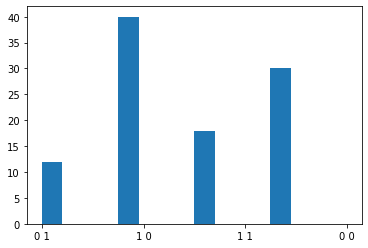

In [13]:
plt.hist([*map(lambda x: " ".join(map(str,[*x])),BB84_experiment(100))],"fd",width=.2);